# **MULTILAYER PERCEPTRON: STUDENT DATASET**

In [1]:
# Installations
!pip install imbalanced-learn

# Imports
import time
import random
import pickle
import warnings
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from google.colab import drive
from imblearn.pipeline import Pipeline
from imblearn.over_sampling import SMOTE
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.feature_selection import SelectKBest, mutual_info_classif
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score
from sklearn.preprocessing import StandardScaler

# Reproducible results
SEED = 42
np.random.seed(SEED)
random.seed(SEED)

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [2]:
# 1. Mount google drive
drive.mount('/content/gdrive', force_remount=True)

Mounted at /content/gdrive


## **A. FIRST YEAR DATASET**

#### **1. DISPLAY THE DATASET**

In [3]:
# 1. load and display the train dataset
df = pd.read_csv('gdrive/MyDrive/COMS HONS RESEARCH PROJECT/first_year_train.csv')
df.head()

,Unnamed: 0,YearStarted,PlanCode,PlanDescription,ProbOfMatheStreamline,ProbOfPhysicsStreamline,ProbofBioStreamline,AggregateYOS1,RaceDescription,AgeatFirstYear,LifeOrientation,EnglishFirstLang,EnglishFirstAdditional,NBTAL,NBTMA,NBTQL,ProgressoutcomeYOS1
0,0,0.633229,0.813618,0.291103,1.400196,-0.900613,-0.660940,0.618172,-0.659496,-0.342259,0.543607,-4.611209e-03,0.000000,-0.310131,1.407877e+00,-6.116022e-01,4
1,1,-1.065648,-0.130947,-0.635273,-1.162318,-0.739018,2.484212,0.641247,1.802742,0.958744,0.668683,1.253807e+00,0.000000,0.330381,-2.561529e-01,3.636643e-01,4
2,2,1.312780,-1.075512,0.291103,1.187297,-0.900613,-0.660940,-1.099003,-0.659496,-1.318012,-2.082976,2.554742e-15,-0.444814,-1.225148,2.854859e+00,-1.436828e+00,0
3,3,-0.386097,-0.045078,-0.542636,-0.386634,0.530659,-0.660940,-1.101578,-0.659496,0.308242,-0.081769,2.554742e-15,-1.459788,0.421883,-1.114547e-01,-1.061725e+00,2
4,4,1.312780,-1.075512,0.291103,-0.495935,1.604113,0.209593,0.256748,-0.659496,-1.318012,0.793758,-1.843852e-01,0.000000,0.000000,-5.140714e-16,-5.330527e-16,4


In [4]:
# 2. remove the 'Unnamed: 0' column 
df = df.drop(columns=['Unnamed: 0'])

In [5]:
# 3. load the pickle file.
with open('gdrive/MyDrive/COMS HONS RESEARCH PROJECT/first_year_map.pkl', 'rb') as fid:
  MAP = pickle.load(fid)

In [6]:
# 4. display the train dataset
df.head()

,YearStarted,PlanCode,PlanDescription,ProbOfMatheStreamline,ProbOfPhysicsStreamline,ProbofBioStreamline,AggregateYOS1,RaceDescription,AgeatFirstYear,LifeOrientation,EnglishFirstLang,EnglishFirstAdditional,NBTAL,NBTMA,NBTQL,ProgressoutcomeYOS1
0,0.633229,0.813618,0.291103,1.400196,-0.900613,-0.660940,0.618172,-0.659496,-0.342259,0.543607,-4.611209e-03,0.000000,-0.310131,1.407877e+00,-6.116022e-01,4
1,-1.065648,-0.130947,-0.635273,-1.162318,-0.739018,2.484212,0.641247,1.802742,0.958744,0.668683,1.253807e+00,0.000000,0.330381,-2.561529e-01,3.636643e-01,4
2,1.312780,-1.075512,0.291103,1.187297,-0.900613,-0.660940,-1.099003,-0.659496,-1.318012,-2.082976,2.554742e-15,-0.444814,-1.225148,2.854859e+00,-1.436828e+00,0
3,-0.386097,-0.045078,-0.542636,-0.386634,0.530659,-0.660940,-1.101578,-0.659496,0.308242,-0.081769,2.554742e-15,-1.459788,0.421883,-1.114547e-01,-1.061725e+00,2
4,1.312780,-1.075512,0.291103,-0.495935,1.604113,0.209593,0.256748,-0.659496,-1.318012,0.793758,-1.843852e-01,0.000000,0.000000,-5.140714e-16,-5.330527e-16,4


In [7]:
# 5. display the map keys
print('MAP Keys:')
print(np.array(list(MAP.keys())))

MAP Keys:
['PlanCode' 'PlanDescription' 'RaceDescription' 'Language' 'Gender'
 'Homeprovince' 'Homecountry' 'isRuralorUrban' 'YearStarted'
 'ProgressoutcomeYOS1' 'FIRST_YEAR_IMPUTATION'
 'first_year_feature_selector' 'first_year_scaler']


In [8]:
# 6. print the number of columns
print('No. of columns:', len(df.columns))
print('No. of rows:', len(df))
print('No. of nulls:', df.isna().sum().sum())

No. of columns: 16
No. of rows: 5450
No. of nulls: 0


#### **2. TRAIN MULTI-LAYER PERCEPTRON MODEL**

In [9]:
# 1. Generate the X and y sets.
f_y = df['ProgressoutcomeYOS1']
f_X = df.drop(columns=['ProgressoutcomeYOS1'])

In [10]:
# 2. Initialize the model and define pipeline to perform oversampling.
steps = [('over', SMOTE(random_state=SEED)), 
         ('model', MLPClassifier())]
pipeline = Pipeline(steps=steps)

In [11]:
# 3. Define evaluation
cross_val = RepeatedStratifiedKFold(n_splits=10, n_repeats=1, random_state=SEED)

In [19]:
# 4. define search space
search_space = {'model__hidden_layer_sizes': [(20, 10), (20, 10, 8)],
                'model__max_iter': [1000, 3000, 10000],
                'model__random_state': [SEED],
                'model__verbose': [True]}

In [20]:
# 5. Define the GridSearch
search = GridSearchCV(pipeline, search_space, scoring='accuracy', n_jobs=-1, cv=cross_val, return_train_score=True)

In [21]:
# 6. Execute the search
result = search.fit(f_X, f_y)

Iteration 1, loss = 1.80713562
Iteration 2, loss = 1.49985903
Iteration 3, loss = 1.25502194
Iteration 4, loss = 1.10091618
Iteration 5, loss = 1.00880032
Iteration 6, loss = 0.95211182
Iteration 7, loss = 0.91106214
Iteration 8, loss = 0.87912285
Iteration 9, loss = 0.85340109
Iteration 10, loss = 0.83182459
Iteration 11, loss = 0.81295143
Iteration 12, loss = 0.79660019
Iteration 13, loss = 0.78306885
Iteration 14, loss = 0.77125321
Iteration 15, loss = 0.76109347
Iteration 16, loss = 0.75183137
Iteration 17, loss = 0.74325048
Iteration 18, loss = 0.73619112
Iteration 19, loss = 0.72826260
Iteration 20, loss = 0.72110677
Iteration 21, loss = 0.71511894
Iteration 22, loss = 0.70962701
Iteration 23, loss = 0.70457927
Iteration 24, loss = 0.69890294
Iteration 25, loss = 0.69419187
Iteration 26, loss = 0.68958681
Iteration 27, loss = 0.68502376
Iteration 28, loss = 0.67985694
Iteration 29, loss = 0.67635082
Iteration 30, loss = 0.67250603
Iteration 31, loss = 0.66849328
Iteration 32, los

In [22]:
# 7. Display the results
print('Best Accuracy Score:', result.best_score_)
print('Best Hyperparameters:', result.best_params_)
print('Mean train scores:', result.cv_results_['mean_train_score'])
print('Mean test scores:', result.cv_results_['mean_test_score'])

Best Accuracy Score: 0.633394495412844
Best Hyperparameters: {'model__hidden_layer_sizes': (20, 10), 'model__max_iter': 1000, 'model__random_state': 42, 'model__verbose': True}
Mean train scores: [0.69610601 0.69610601 0.69610601 0.69437309 0.69437309 0.69437309]
Mean test scores: [0.6333945  0.6333945  0.6333945  0.62733945 0.62733945 0.62733945]


#### **3. EVALUATE THE MODEL ON TEST DATASET.**

###### **3.1. LOAD THE TEST DATASET**

In [23]:
# 1. load the test dataset.
df_test = pd.read_csv('gdrive/MyDrive/COMS HONS RESEARCH PROJECT/first_year_test.csv')
df_test.head()

,Unnamed: 0,YearStarted,PlanCode,PlanDescription,ProbOfMatheStreamline,ProbOfPhysicsStreamline,ProbofEarthStreamline,ProbofBioStreamline,AggregateYOS1,RaceDescription,...,MathematicsMatricLit,MathematicsMatricMajor,EnglishFirstLang,EnglishFirstAdditional,Computers,AdditionalMathematics,NBTAL,NBTMA,NBTQL,ProgressoutcomeYOS1
0,7477,3,19,9,0.058824,0.117647,0.0,0.764706,45.400000,0,...,NaN,35.0,64.0,NaN,NaN,NaN,56.0,35.0,51.0,4
1,9134,8,30,19,0.250000,0.166667,0.0,0.416667,53.000000,0,...,NaN,33.0,66.0,NaN,NaN,NaN,73.0,33.0,39.0,4
2,13723,6,20,10,0.015152,0.015152,0.0,0.969697,65.888889,0,...,NaN,42.0,75.0,NaN,NaN,NaN,58.0,42.0,59.0,4
3,6760,8,30,19,0.863636,0.000000,0.0,0.000000,50.285714,0,...,NaN,66.0,NaN,73.0,NaN,NaN,61.0,66.0,53.0,4
4,4873,8,30,19,0.791667,0.208333,0.0,0.000000,94.500000,4,...,NaN,95.0,85.0,NaN,NaN,94.0,NaN,NaN,NaN,4


In [24]:
# 2. remove the 'Unnamed: 0' column 
df_test = df_test.drop(columns=['Unnamed: 0'])

###### **3.2. PREPROCESS THE TEST DATASET**

In [25]:
# 1. Impute the null values using the means from Train dataset
df_test = df_test.fillna(MAP['FIRST_YEAR_IMPUTATION'])

In [26]:
# 2. Initialize the feature selector
first_year_fs = MAP['first_year_feature_selector']

In [27]:
# 3. Get the X from the test dataset and select k best features using the train feature selector
f_X_test = df_test.drop(columns=['ProgressoutcomeYOS1'])
f_y_test = df_test['ProgressoutcomeYOS1']
f_X_test = first_year_fs.transform(f_X_test)
f_X_test = pd.DataFrame(f_X_test)
f_X_test.columns = first_year_fs.get_feature_names_out()

In [28]:
# 4. Initialize the Standardizer
first_year_scaler = MAP['first_year_scaler']

In [29]:
# 5. Standardize the X_test using the standardizer used for the train dataset.
f_X_test = first_year_scaler.transform(f_X_test)
f_X_test = pd.DataFrame(f_X_test)
f_X_test.columns = first_year_fs.get_feature_names_out()
f_X_test.head()

,YearStarted,PlanCode,PlanDescription,ProbOfMatheStreamline,ProbOfPhysicsStreamline,ProbofBioStreamline,AggregateYOS1,RaceDescription,AgeatFirstYear,LifeOrientation,EnglishFirstLang,EnglishFirstAdditional,NBTAL,NBTMA,NBTQL
0,-0.725872,-0.130947,-0.635273,-1.081016,-0.311266,2.001867,-0.697299,-0.659496,0.633493,-0.832222,-1.802351e+00,0.000000,-0.401633,-1.196691e+00,-3.115202e-01
1,0.973004,0.813618,0.291103,-0.495935,-0.065705,0.789948,-0.110193,-0.659496,-1.318012,0.418532,-1.442803e+00,0.000000,1.153896,-1.341390e+00,-1.211766e+00
2,0.293454,-0.045078,-0.542636,-1.214671,-0.824713,2.715673,0.885484,-0.659496,-0.017009,-0.081769,1.751628e-01,0.000000,-0.218629,-6.902476e-01,2.886438e-01
3,0.973004,0.813618,0.291103,1.382052,-0.900613,-0.660940,-0.319874,-0.659496,-0.992761,-0.456996,2.554742e-15,-0.038825,0.055876,1.046131e+00,-1.614792e-01
4,0.973004,0.813618,0.291103,1.161794,0.143022,-0.660940,3.095714,1.802742,-0.992761,1.294060,1.972902e+00,0.000000,0.000000,-5.140714e-16,-5.330527e-16


In [30]:
# 6. print the number of columns
print('No. of columns in X:', len(f_X_test.columns))
print('No. of rows in X:', len(f_X_test))
print('No. of nulls in X:', f_X_test.isna().sum().sum(), '\n')

print('No. of rows in Y:', len(f_y_test))
print('No. of nulls in Y:', f_y_test.isna().sum().sum())

No. of columns in X: 15
No. of rows in X: 1363
No. of nulls in X: 0 

No. of rows in Y: 1363
No. of nulls in Y: 0


###### **3.3. EVALUATE THE MODEL**

In [31]:
def plot_confusion_matrix(true_labels, pred_labels, labels):
  '''
  Plots the confusion matrix
  '''
  # compute the matrix
  matrix = confusion_matrix(true_labels, pred_labels, labels=np.arange(len(labels)))
  # create a figure of the matrix
  fig = ConfusionMatrixDisplay(confusion_matrix=matrix, display_labels=labels)
  # rotate the x_labels
  fig.plot(xticks_rotation='vertical')
  # plot the matrix
  plt.show()

In [32]:
# 1. compute the Accuracy, Recall, Precision and F1-Score for test dataset.
f_y_test_pred = result.best_estimator_.predict(f_X_test)
print('============= Test Scores =============')
print('Accuracy Score:', accuracy_score(f_y_test, f_y_test_pred))
print('Recall Score:', recall_score(f_y_test, f_y_test_pred, average='micro'))
print('Precision Score:', precision_score(f_y_test, f_y_test_pred, average='micro'))
print('F1-Score:', f1_score(f_y_test, f_y_test_pred, average='micro'))

============= Test Scores =============
Accuracy Score: 0.6581071166544388
Recall Score: 0.6581071166544388
Precision Score: 0.6581071166544388
F1-Score: 0.6581071166544388


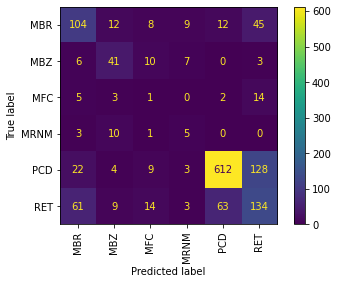

In [33]:
# 2. plot confusion matrix
labels = np.array(sorted(MAP['ProgressoutcomeYOS1'].items(), key=lambda item: item[1]))[:,0]
plot_confusion_matrix(f_y_test, f_y_test_pred, labels)

In [34]:
# 3. save the model.
with open('/content/gdrive/MyDrive/COMS HONS RESEARCH PROJECT/mlp_first_year.pkl', 'wb') as fid:
  pickle.dump(result.best_estimator_, fid)

## **B. SECOND YEAR DATASET**

#### **1. DISPLAY THE DATASET**

In [35]:
# 1. load and display the train dataset
df = pd.read_csv('gdrive/MyDrive/COMS HONS RESEARCH PROJECT/second_year_train.csv')
df.head()

,Unnamed: 0,YearStarted,PlanCode,PlanDescription,ProbOfMatheStreamline,ProbOfPhysicsStreamline,ProbofBioStreamline,AggregateYOS1,ProgressoutcomeYOS1,Firstyearoutcome,...,Language,Homeprovince,AgeatFirstYear,AgeatSecondYear,EnglishFirstLang,EnglishFirstAdditional,Computers,NBTAL,NBTQL,ProgressoutcomeYOS2
0,0,1.412382,-1.193108,-1.428669,1.193993,-0.667475,-0.686405,1.249947,0.005711,0.506922,...,-1.005582,0.326652,-1.418129,-1.418129,2.704824e+00,3.106592e-15,2.929565e+00,0.829917,2.167776e+00,4
1,1,1.022954,-1.193108,-1.428669,1.276913,-0.667475,-0.686405,2.709529,0.005711,0.506922,...,-1.005582,-0.439724,-1.044375,-1.044375,2.539227e+00,3.106592e-15,-3.129260e-15,0.000000,1.055208e-15,4
2,2,0.244097,0.106569,0.153156,0.952548,-0.667475,-0.686405,0.956004,0.005711,0.506922,...,-1.005582,-0.439724,-0.296865,-0.296865,8.832487e-01,3.106592e-15,-3.734665e-01,0.548778,-2.825948e-01,4
3,3,-1.703046,-1.665717,3.203819,-0.936027,2.824622,-0.686405,-0.298957,0.005711,0.506922,...,-1.005582,-0.439724,1.571908,1.571908,1.545640e+00,3.106592e-15,-3.129260e-15,1.298482,2.613298e+00,4
4,4,1.022954,1.169941,1.057056,0.317920,0.996057,-0.686405,-0.897613,1.274687,-1.972691,...,1.472077,0.326652,-1.044375,-1.044375,-2.353286e-15,1.102392e+00,-3.129260e-15,0.000000,1.055208e-15,5


In [36]:
# 2. remove the 'Unnamed: 0' column 
df = df.drop(columns=['Unnamed: 0'])

In [37]:
# 3. load the pickle file.
with open('gdrive/MyDrive/COMS HONS RESEARCH PROJECT/second_year_map.pkl', 'rb') as fid:
  MAP = pickle.load(fid)

In [38]:
# 4. display the train dataset
df.head()

,YearStarted,PlanCode,PlanDescription,ProbOfMatheStreamline,ProbOfPhysicsStreamline,ProbofBioStreamline,AggregateYOS1,ProgressoutcomeYOS1,Firstyearoutcome,AggregateYOS2,...,Language,Homeprovince,AgeatFirstYear,AgeatSecondYear,EnglishFirstLang,EnglishFirstAdditional,Computers,NBTAL,NBTQL,ProgressoutcomeYOS2
0,1.412382,-1.193108,-1.428669,1.193993,-0.667475,-0.686405,1.249947,0.005711,0.506922,0.916101,...,-1.005582,0.326652,-1.418129,-1.418129,2.704824e+00,3.106592e-15,2.929565e+00,0.829917,2.167776e+00,4
1,1.022954,-1.193108,-1.428669,1.276913,-0.667475,-0.686405,2.709529,0.005711,0.506922,1.268135,...,-1.005582,-0.439724,-1.044375,-1.044375,2.539227e+00,3.106592e-15,-3.129260e-15,0.000000,1.055208e-15,4
2,0.244097,0.106569,0.153156,0.952548,-0.667475,-0.686405,0.956004,0.005711,0.506922,0.215177,...,-1.005582,-0.439724,-0.296865,-0.296865,8.832487e-01,3.106592e-15,-3.734665e-01,0.548778,-2.825948e-01,4
3,-1.703046,-1.665717,3.203819,-0.936027,2.824622,-0.686405,-0.298957,0.005711,0.506922,1.801773,...,-1.005582,-0.439724,1.571908,1.571908,1.545640e+00,3.106592e-15,-3.129260e-15,1.298482,2.613298e+00,4
4,1.022954,1.169941,1.057056,0.317920,0.996057,-0.686405,-0.897613,1.274687,-1.972691,-1.071946,...,1.472077,0.326652,-1.044375,-1.044375,-2.353286e-15,1.102392e+00,-3.129260e-15,0.000000,1.055208e-15,5


In [39]:
# 5. display the map keys
print('MAP Keys:')
print(np.array(list(MAP.keys())))

MAP Keys:
['PlanCode' 'PlanDescription' 'RaceDescription' 'Language' 'Gender'
 'Homeprovince' 'Homecountry' 'isRuralorUrban' 'YearStarted'
 'Firstyearoutcome' 'ProgressoutcomeYOS1' 'ProgressoutcomeYOS2'
 'SECOND_YEAR_IMPUTATION' 'second_year_feature_selector'
 'second_year_scaler']


In [40]:
# 6. print the number of columns
print('No. of columns:', len(df.columns))
print('No. of rows:', len(df))
print('No. of nulls:', df.isna().sum().sum())

No. of columns: 21
No. of rows: 3111
No. of nulls: 0


#### **2. TRAIN MULTI-LAYER PERCEPTRON MODEL**

In [41]:
# 1. Generate the X and y sets.
s_y = df['ProgressoutcomeYOS2']
s_X = df.drop(columns=['ProgressoutcomeYOS2'])

In [42]:
# 2. Initialize the model and define pipeline to perform oversampling.
steps = [('over', SMOTE(random_state=SEED)), 
         ('model', MLPClassifier())]
pipeline = Pipeline(steps=steps)

In [43]:
# 3. Define evaluation
cross_val = RepeatedStratifiedKFold(n_splits=10, n_repeats=1, random_state=SEED)

In [44]:
# 4. define search space
search_space = {'model__hidden_layer_sizes': [(20, 10), (20, 10, 8)],
                'model__max_iter': [1000, 3000, 10000],
                'model__random_state': [SEED],
                'model__verbose': [True]}

In [45]:
# 5. Define the GridSearch
search = GridSearchCV(pipeline, search_space, scoring='accuracy', n_jobs=-1, cv=cross_val, return_train_score=True)

In [46]:
# 6. Execute the search
result = search.fit(s_X, s_y)

Iteration 1, loss = 1.86828003
Iteration 2, loss = 1.74851465
Iteration 3, loss = 1.58345885
Iteration 4, loss = 1.44519056
Iteration 5, loss = 1.26109778
Iteration 6, loss = 1.06336569
Iteration 7, loss = 0.94292971
Iteration 8, loss = 0.85816548
Iteration 9, loss = 0.79714726
Iteration 10, loss = 0.74807773
Iteration 11, loss = 0.70781387
Iteration 12, loss = 0.67444806
Iteration 13, loss = 0.64493795
Iteration 14, loss = 0.61852188
Iteration 15, loss = 0.59832411
Iteration 16, loss = 0.58016945
Iteration 17, loss = 0.56507564
Iteration 18, loss = 0.55185936
Iteration 19, loss = 0.54011085
Iteration 20, loss = 0.52957845
Iteration 21, loss = 0.51957429
Iteration 22, loss = 0.50882127
Iteration 23, loss = 0.50094815
Iteration 24, loss = 0.49144574
Iteration 25, loss = 0.48451210
Iteration 26, loss = 0.47709404
Iteration 27, loss = 0.47087664
Iteration 28, loss = 0.46433368
Iteration 29, loss = 0.45800007
Iteration 30, loss = 0.45313416
Iteration 31, loss = 0.44781396
Iteration 32, los

In [47]:
# 7. Display the results
print('Best Accuracy Score:', result.best_score_)
print('Best Hyperparameters:', result.best_params_)
print('Mean train scores:', result.cv_results_['mean_train_score'])
print('Mean test scores:', result.cv_results_['mean_test_score'])

Best Accuracy Score: 0.6377432187319647
Best Hyperparameters: {'model__hidden_layer_sizes': (20, 10, 8), 'model__max_iter': 1000, 'model__random_state': 42, 'model__verbose': True}
Mean train scores: [0.75349092 0.75349092 0.75349092 0.75349097 0.75349097 0.75349097]
Mean test scores: [0.63228316 0.63228316 0.63228316 0.63774322 0.63774322 0.63774322]


#### **3. EVALUATE THE MODEL ON TEST DATASET.**

###### **3.1. LOAD THE TEST DATASET**

In [48]:
# 1. load the test dataset.
df_test = pd.read_csv('gdrive/MyDrive/COMS HONS RESEARCH PROJECT/second_year_test.csv')
df_test.head()

,Unnamed: 0,YearStarted,PlanCode,PlanDescription,ProbOfMatheStreamline,ProbOfPhysicsStreamline,ProbofEarthStreamline,ProbofBioStreamline,AggregateYOS1,ProgressoutcomeYOS1,...,MathematicsMatricLit,MathematicsMatricMajor,EnglishFirstLang,EnglishFirstAdditional,Computers,AdditionalMathematics,NBTAL,NBTMA,NBTQL,ProgressoutcomeYOS2
0,5897,3,19,15,0.025641,0.025641,0.000000,0.948718,65.769231,3,...,NaN,70.0,74.0,NaN,NaN,NaN,NaN,NaN,NaN,4
1,2456,7,22,19,0.055556,0.111111,0.000000,0.555556,66.500000,3,...,NaN,33.0,87.0,NaN,NaN,38.0,74.0,33.0,49.0,4
2,8379,6,4,0,0.850000,0.000000,0.000000,0.000000,49.000000,3,...,NaN,43.0,NaN,73.0,NaN,NaN,58.0,43.0,62.0,1
3,2688,3,5,1,0.014706,0.029412,0.955882,0.000000,61.333333,3,...,NaN,37.0,NaN,71.0,NaN,NaN,39.0,37.0,46.0,4
4,8334,8,21,18,0.272727,0.727273,0.000000,0.000000,58.000000,3,...,NaN,37.0,NaN,66.0,NaN,NaN,51.0,37.0,36.0,4


In [49]:
# 2. remove the 'Unnamed: 0' column 
df_test = df_test.drop(columns=['Unnamed: 0'])

###### **3.2. PREPROCESS THE TEST DATASET**

In [50]:
# 1. Impute the null values using the means from Train dataset
df_test = df_test.fillna(MAP['SECOND_YEAR_IMPUTATION'])

In [51]:
# 2. Initialize the feature selector
second_year_fs = MAP['second_year_feature_selector']

In [52]:
# 3. Get the X from the test dataset and select k best features using the train feature selector
s_X_test = df_test.drop(columns=['ProgressoutcomeYOS2'])
s_y_test = df_test['ProgressoutcomeYOS2']
s_X_test = second_year_fs.transform(s_X_test)
s_X_test = pd.DataFrame(s_X_test)
s_X_test.columns = second_year_fs.get_feature_names_out()

In [53]:
# 4. Initialize the Standardizer
second_year_scaler = MAP['second_year_scaler']

In [54]:
# 5. Standardize the X_test using the standardizer used for the train dataset.
s_X_test = second_year_scaler.transform(s_X_test)
s_X_test = pd.DataFrame(s_X_test)
s_X_test.columns = second_year_fs.get_feature_names_out()
s_X_test.head()

,YearStarted,PlanCode,PlanDescription,ProbOfMatheStreamline,ProbOfPhysicsStreamline,ProbofBioStreamline,AggregateYOS1,ProgressoutcomeYOS1,Firstyearoutcome,AggregateYOS2,RaceDescription,Language,Homeprovince,AgeatFirstYear,AgeatSecondYear,EnglishFirstLang,EnglishFirstAdditional,Computers,NBTAL,NBTQL
0,-0.534760,0.579179,0.266144,-0.977886,-0.527324,2.109834,0.647636,0.005711,0.506922,0.413196,-0.729872,1.472077,-0.439724,0.450644,0.450644,-1.103381e-01,3.106592e-15,-3.129260e-15,0.000000,1.055208e-15
1,1.022954,0.933636,0.718094,-0.899750,-0.060154,0.951032,0.725410,0.005711,0.506922,1.161267,1.631679,-1.005582,-0.439724,-1.044375,-1.044375,2.042433e+00,3.106592e-15,-3.129260e-15,1.111056,-5.796095e-01
2,0.633525,-1.193108,-1.428669,1.175336,-0.667475,-0.686405,-1.137076,0.005711,0.506922,-2.040039,-0.729872,1.196781,1.093029,-0.670620,-0.670620,-2.353286e-15,9.356719e-03,-3.129260e-15,-0.388352,3.856882e-01
3,-0.534760,-1.074955,-1.315682,-1.006449,-0.506713,-0.686405,0.175533,0.005711,0.506922,0.207843,-0.729872,1.472077,0.326652,0.450644,0.450644,-2.353286e-15,-4.278572e-01,-3.129260e-15,-2.168898,-8.023705e-01
4,1.412382,0.815483,0.605106,-0.332498,3.307718,-0.686405,-0.179226,0.005711,0.506922,0.090498,-0.729872,0.003835,-0.439724,-1.044375,-1.044375,-2.353286e-15,-1.520892e+00,-3.129260e-15,-1.044343,-1.544907e+00


In [55]:
# 6. print the number of columns
print('No. of columns in X:', len(s_X_test.columns))
print('No. of rows in X:', len(s_X_test))
print('No. of nulls in X:', s_X_test.isna().sum().sum(), '\n')

print('No. of rows in Y:', len(s_y_test))
print('No. of nulls in Y:', s_y_test.isna().sum().sum())

No. of columns in X: 20
No. of rows in X: 778
No. of nulls in X: 0 

No. of rows in Y: 778
No. of nulls in Y: 0


###### **3.3. EVALUATE THE MODEL**

In [56]:
# 1. compute the Accuracy, Recall, Precision and F1-Score for test dataset.
s_y_test_pred = result.best_estimator_.predict(s_X_test)
print('============= Test Scores =============')
print('Accuracy Score:', accuracy_score(s_y_test, s_y_test_pred))
print('Recall Score:', recall_score(s_y_test, s_y_test_pred, average='micro'))
print('Precision Score:', precision_score(s_y_test, s_y_test_pred, average='micro'))
print('F1-Score:', f1_score(s_y_test, s_y_test_pred, average='micro'))

============= Test Scores =============
Accuracy Score: 0.6658097686375322
Recall Score: 0.6658097686375322
Precision Score: 0.6658097686375322
F1-Score: 0.6658097686375322


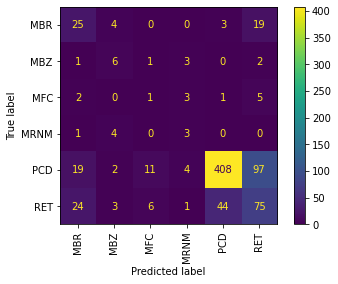

In [57]:
# 2. plot confusion matrix
labels = np.array(sorted(MAP['ProgressoutcomeYOS2'].items(), key=lambda item: item[1]))[:,0]
plot_confusion_matrix(s_y_test, s_y_test_pred, labels)

In [58]:
# 3. Save the model.
with open('/content/gdrive/MyDrive/COMS HONS RESEARCH PROJECT/mlp_second_year.pkl', 'wb') as fid:
  pickle.dump(result.best_estimator_, fid)